# 비지도 변환(unsupervied transformation)

feature 많은 고차원 데이터를 feature 수를 줄이면서도 꼭 필요한 특징을 포함하도록 하는 dimensionality reduction에 쓰임.

대표적인 경우 = 시각화를 위해 2차원으로 데이터 변경하는 경우.

데이터 구성 단위나 성분을 찾기도 하는데, 보통 텍스트 문서에서 주제를 찾는 경우임.

* 가장 어려운 과제: 알고리즘이 과연 유용한 것을 학습했는지 평가하기. 뭐가 올바른 출력인지 확실하지 않기에 어떤 모델이 잘하고 있는지 평가하기 어려움.

결과 평가의 유일한 방법은 '직접 확인하기'인 경우가 많다.

그렇다 보니 '탐색적 데이터분석' 단계에서 쓰는 경우가 많다. 지도학습의 전처리 단계에서 사용하기도. 정확도가 올라가거나 메모리 / 시간 절약.

### 데이터 전처리 / 스케일 조정 

1. StandardScaler = 평균 0, 분산 1로 표준정규분포화. 단 특성의 최대 / 최소값을 제한하지는 않는다.
2. RobustScaler = 특성들이 same scale로 변환되지만, 평균&분산 대신 median, quartile을 사용한다. 이 결과로 '측정 에러'가 영향을 받지 않게 됨. 이런 형태의 outlier는 다른 스케일 조정기법에서 문제가 되기도 함

3. MinMaxScaler = 모든 특성이 0~1 사이에 위치하도록 변경.
4. Normalizer = 지름이 1인 원에 데이터를 투영. 특성 벡터의 길이는 상관없고 데이터의 방향이 중요할 때 사용한다. (?)

In [1]:
import pandas as pd
import numpy as np
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn
import sklearn
from sklearn.model_selection import train_test_split

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

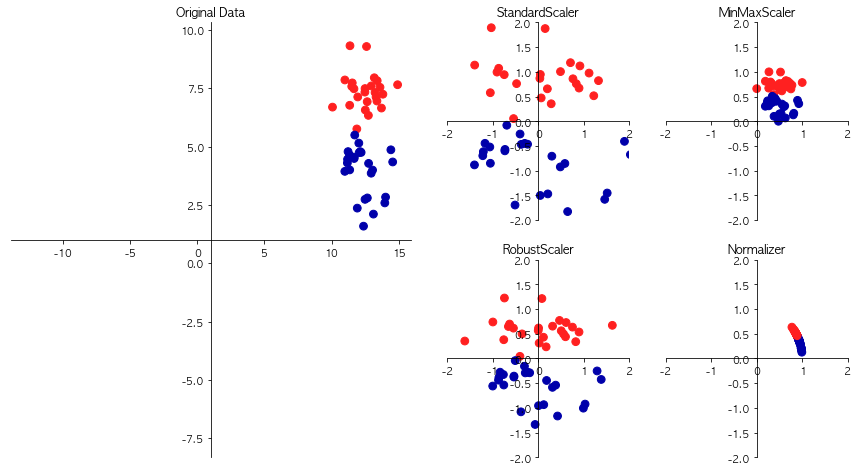

In [2]:
mglearn.plots.plot_scaling()

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state = 1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [5]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
# 변환된 데이터를 학습하는 데 적용하려면, scale 객체의 transform 메소드를 써야 한다.
X_train_scaled = scaler.transform(X_train)
print('변환 이후 크기: {}'.format(X_train_scaled.shape))
print("스케일 조정 이전 feature별 최솟값: {}".format(X_train.min(axis = 0)))
print("스케일 조정 이전 feature별 최댓값: {}".format(X_train.max(axis=0)))
print("조정 이후 최솟값: {}".format(X_train_scaled.min(axis=0)))
print("조정 이후 최댓값: {}".format(X_train_scaled.max(axis=0)))

# 최솟값을 0, 최댓값을 1로 두고 그 사이 값으로 전부 조정했기 때문에, feature의 최솟값과 최댓값은 전부 0이 되었다.

변환 이후 크기: (426, 30)
스케일 조정 이전 feature별 최솟값: [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 이전 feature별 최댓값: [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
조정 이후 최솟값: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
조정 이후 최댓값: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
# 이 데이터에 SVM을 적용하려면, test set도 동일하게 변환해야 한다.

X_test_scaled = scaler.transform(X_test)
print('변환 이후 크기: {}'.format(X_test_scaled.shape))
print("스케일 조정 이전 feature별 최솟값: {}".format(X_test.min(axis = 0)))
print("스케일 조정 이전 feature별 최댓값: {}".format(X_test.max(axis=0)))
print("조정 이후 최솟값: {}".format(X_test_scaled.min(axis=0)))
print("조정 이후 최댓값: {}".format(X_test_scaled.max(axis=0)))

# 단, minmax를 변환하는 기준은 training set의 기준을 "반드시" 그대로 써야 한다. 
# scaler.fit(X_train)으로 미리 설정했기 때문에 이런 값이 나오는 것.

변환 이후 크기: (143, 30)
스케일 조정 이전 feature별 최솟값: [7.691e+00 1.038e+01 4.834e+01 1.704e+02 6.828e-02 3.116e-02 0.000e+00
 0.000e+00 1.365e-01 4.996e-02 1.115e-01 3.871e-01 8.484e-01 7.228e+00
 2.866e-03 3.746e-03 0.000e+00 0.000e+00 7.882e-03 1.087e-03 8.678e+00
 1.420e+01 5.449e+01 2.236e+02 8.774e-02 5.131e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
스케일 조정 이전 feature별 최댓값: [2.722e+01 3.381e+01 1.821e+02 2.250e+03 1.425e-01 3.454e-01 3.754e-01
 1.878e-01 2.906e-01 9.744e-02 1.292e+00 2.612e+00 1.012e+01 1.587e+02
 1.604e-02 1.006e-01 3.038e-01 3.322e-02 7.895e-02 1.220e-02 3.312e+01
 4.178e+01 2.208e+02 3.216e+03 2.098e-01 1.058e+00 1.252e+00 2.688e-01
 6.638e-01 2.075e-01]
조정 이후 최솟값: [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792 

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# 이 방식을 써서 효율적으로 처리할 수 있다.

# 지도학습에서 데이터 전처리 효과 

In [9]:
from sklearn.svm import SVC

svm = SVC(C=100)
svm.fit(X_train, y_train)

/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
print('테스트 세트 정확도: {:.2f}'.format(svm.score(X_test, y_test)))

테스트 세트 정확도: 0.62


In [11]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
svm.fit(X_train_scaled, y_train)
print("테스트 세트 정확도 : {}".format(svm.score(X_test_scaled,y_test)))

테스트 세트 정확도 : 0.965034965034965


/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


모든 전처리 모델이 fit, transform으로 이루어져 있으므로, 파이썬 클래스만 바꾸면 된다.

# 차원 축소, 특성 추출, manifold 학습

비지도 학습으로 데이터를 변환하는 이유는 
1. 시각화
2. 데이터 압축
3. 지도학습에 쓰기 위한 처리

가장 흔히 쓰이는 알고리즘...
* 주성분 분석(PCA)
* 특성 추출에 많이 쓰이는 비음수 행렬 분해(non-negative matrix factorization. NMF)
* 2차원 산점도로 시각화할 때 많이 쓰는 t-SNE

## 주성분 분석

특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술. 

회전한 뒤 데이터를 설명하는 데 얼마나 중요한가에 따라

종종 새로운 특성 중 일부만 선택된다.

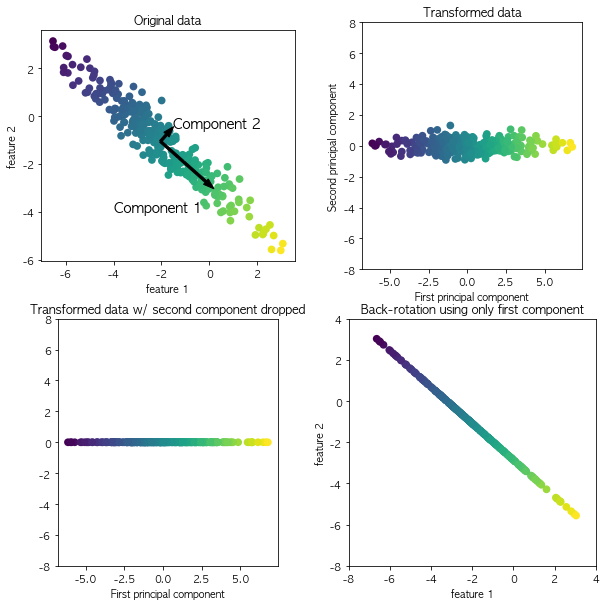

In [13]:
mglearn.plots.plot_pca_illustration()

1. 분산이 가장 큰 데이터를 찾는다. (위의 경우 component 1) = 특성들의 상관관계가 가장 큰 데이터.
2. 이 데이터와 직각인 방향 중 가장 많은 정보를 담은 방향을 찾는다 (component 2)
    이렇게 찾은 방향을 '주성분'이라고 한다. 일반적으로 원본 특성 개수만큼 주성분이 있다고 본다.
    
3. 1과 2를 각각 x축과 y축에 나란하도록 회전한다. 이렇게 회전된 두 축은 서로 연관이 없음. = corr가 0이 된다. + 데이터에서 평균을 뺀다 (중심을 원점에 맞추기 위해)
4. 여기서 첫 번째 feature만 유지하도록 변경 = 차원 축소.
5. 다시 데이터에 평균을 더하고 회전시킨다. 이 결과 '원래 특성 공간'에 데이터가 놓여 있지만, component 1의 특성만 담고 있는 결과가 된다.

# 유방암 데이터셋 PCA 적용해 시각화하기

feature 개수가 30개.

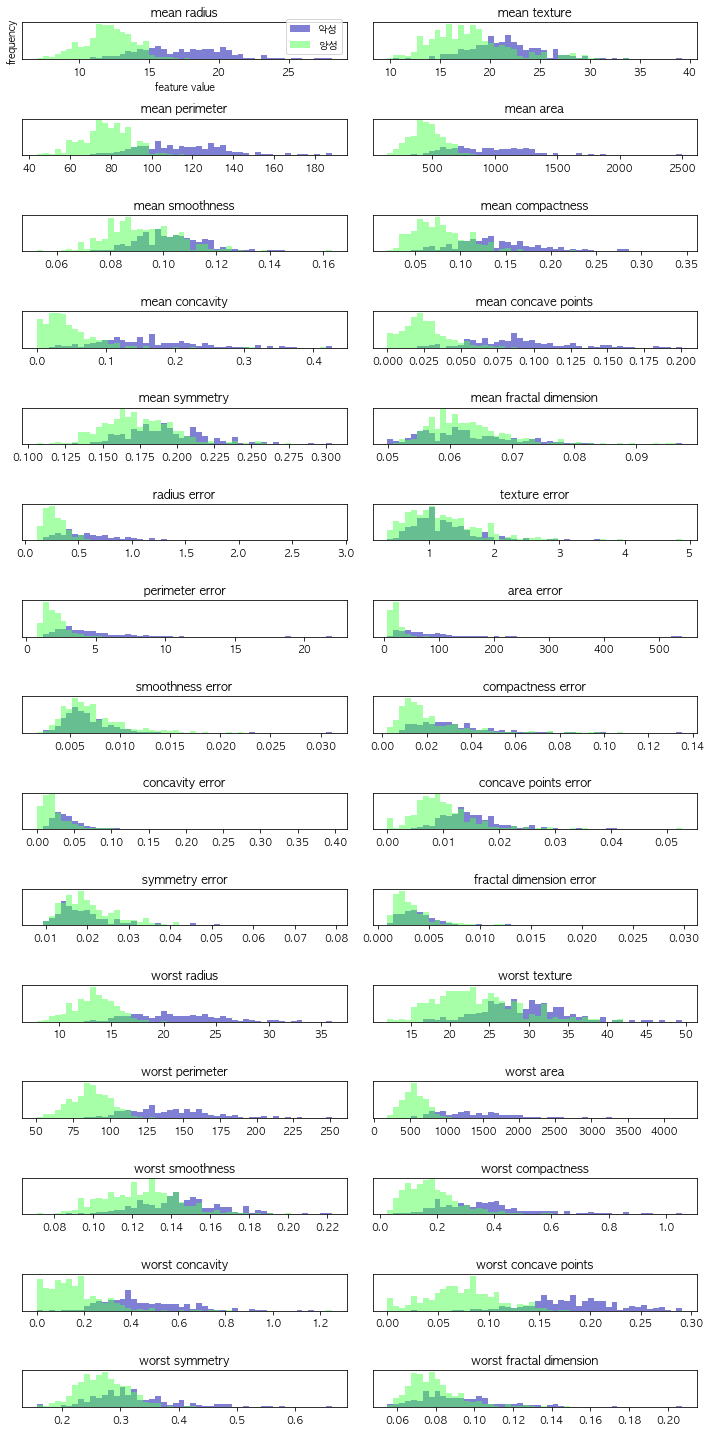

In [14]:
fig, axes = plt.subplots(15,2,figsize =(10,20))
malignant = cancer.data[cancer.target ==0]
benign = cancer.data[cancer.target==1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins = 50)
    ax[i].hist(malignant[:,i], bins = bins, color = mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:,i], bins = bins, color = mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('feature value')
ax[0].set_ylabel('frequency')
ax[0].legend(['악성','양성'], loc = 'best')
fig.tight_layout()

두 개가 겹칠수록 특성을 쓰기 쉽지 않다.

그리고, 이 그래프는 'feature 간 상호작용' / 해당 상호작용이 클래스와 어떤 관련이 있는지는 알려주지 못한다.

PCA를 사용하면 주요 상호작용을 찾아낼 수 있어 더 나은 그림을 그릴 수 있다.

PCA 적용 이전, StandardScaler를 써서 각 특성의 분산이 1이 되도록 스케일 조정.

In [15]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [16]:
from sklearn.decomposition import PCA
# 몇 개의 주성분을 유지할 것인지 선택
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
# 두 개의 주성분 데이터를 사용해 데이터를 변환한다.
X_pca= pca.transform(X_scaled)
print('원본 데이터 : {}'.format(str(X_scaled.shape)))
print("수정 후 데이터 : {}".format(str(X_pca.shape)))

원본 데이터 : (569, 30)
수정 후 데이터 : (569, 2)


Text(0, 0.5, 'Second PC')

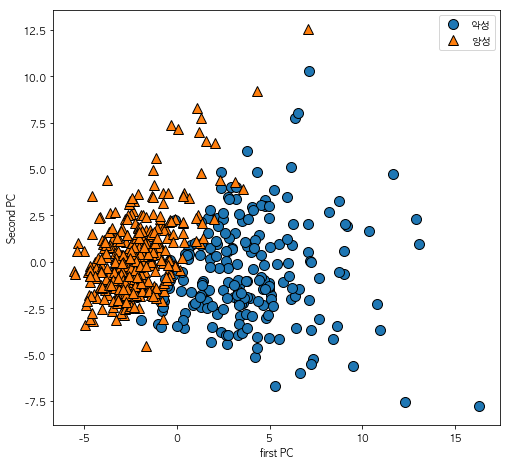

In [18]:
# 맨 처음 데이터 두 개의 주성분을 그려보면
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1], cancer.target)
plt.legend(['악성', '양성'], loc = 'best')
plt.gca().set_aspect('equal')
plt.xlabel("first PC")
plt.ylabel("Second PC")

PCA는 비지도 학습이므로, 회전축을 찾을 때 어떤 클래스 정보도 사용하지 않는다. 데이터 상관관계만 고려함.

위 그림만 보면, PCA로 만들어진 변수 두 개만으로도 선형 분류가 가능할 것처럼 보임.

#### 단점
축을 해석하기가 쉽지 않다. 원본 데이터에 있는 '어떤 방향'에 대응하는 여러 특성이 조합된 결과이기 때문. 이 조합이 매우 복잡함.

객체 학습 과정에서 components_ 변수에 각 feature별 반영 정도가 저장됨.

In [19]:
print("PCA 주성분 형태: {}".format(pca.components_.shape))
print("PCA 주성분 형태: {}".format(pca.components_))

PCA 주성분 형태: (2, 30)
PCA 주성분 형태: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'PCA')

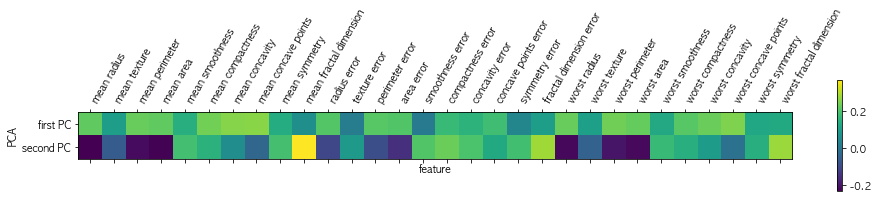

In [20]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0,1],['first PC', 'second PC'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names, rotation = 60, ha = 'left')
plt.xlabel("feature")
plt.ylabel("PCA")

첫 번째 주성분의 feature는 모두 부호가 같다 (양수) (단, 주성분의 화살표 방향은 별 의미가 없다)

== 모든 특성 사이에 공통의 상호관계가 있다는 뜻이다. 한 특성의 값이 커지면 다른 값도 같이 커진다는 의미.

두 번째 주성분부터는 의미 파악이 쉽지 않다.

# eigenface 특성 추출

원본 데이터 표현보다 분석하기에 적합한 표현이 있다는 전제에서 출발. ex) 이미지 다루는 애플리케이션. 

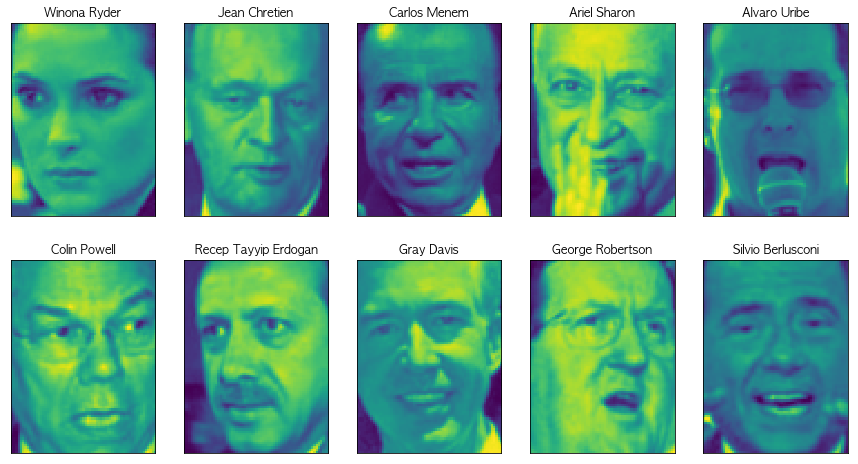

In [22]:
# LFW 데이터셋 : 유명인사들의 얼굴 이미지 데이터.
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize =.7)
image_shape = people.images[0].shape



fig, ax = plt.subplots(2,5, figsize = (15, 8),
                      subplot_kw = {'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, ax.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])


In [23]:
print('people.images.shape: {}'.format(people.images.shape))
# 총 개수 3023개, 각각 87 * 65 픽셀 이미지
print('클래스 개수: {}'.format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
클래스 개수: 62


In [24]:
# 그런데 이 이미지는 좀 편중되어 있다. 조지 W. 부시와 콜린 파월의 이미지가 많은 편.


counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end = " ")
    if (i+1) % 3 ==0:
        print()

# 그래서, 사람마다 50개 이미지만 선택하도록 한정할 예정. 이렇게 하지 않으면 이미지 특성이 편중된 채로 추출됨

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [25]:
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

In [26]:
X_people = X_people/255
# 0~255 사이의 흑백 이미지 픽셀 값을 0~1 스케일로 조절한다. MinMaxScaler와 유사

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
X_people, y_people, stratify = y_people, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print("test set acc : {}".format(knn.score(X_test, y_test)))

test set acc : 0.23255813953488372


보통 '얼굴인식' = 새 얼굴 이미지가 데이터베이스에 있는 기존 얼굴 중 하나에 속하는지 찾는 작업.

다만, '사람의 수'는 많지만 '학습에 필요한 데이터'가 부족함. (클래스별 훈련 데이터량이 적다)
    - 여기에, 대규모 모델을 다시 훈련하지 않고도 새로운 사람의 얼굴을 쉽게 추가할 수 있어야 함.
    
얼굴인식에서 PCA가 필요한 이유. =>

얼굴의 유사도를 측정하기 위해... 주성분으로 변환해 거리를 계산하면 정확도가 높아지지 않을까?

여기서는 whitening 옵션을 써서 주성분 스케일이 같아지도록 조정.

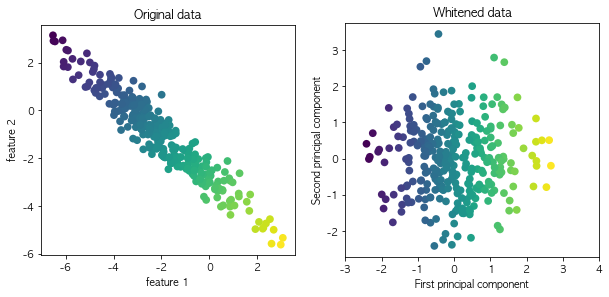

In [32]:
mglearn.plots.plot_pca_whitening()

In [33]:
# pca 객체를 훈련 데이터로 학습시켜서 처음 100개의 주성분을 추출한다. 이 다음 훈련 데이터와 테스트 데이터를 변환한다.
pca = PCA(n_components=100, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca, y_train)
print("test set acc : {}".format(knn.score(X_test_pca, y_test)))

test set acc : 0.312015503875969


In [35]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


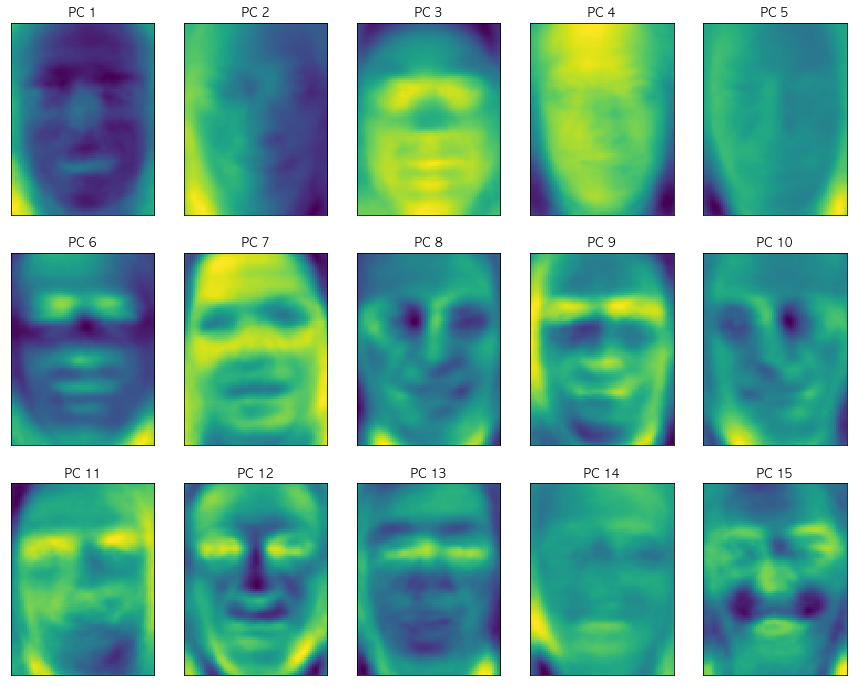

In [36]:
fig, ax = plt.subplots(3,5,figsize=(15,12), subplot_kw = {'xticks':(),'yticks':()})

for i, (component, ax) in enumerate(zip(pca.components_,ax.ravel())):
    ax.imshow(component.reshape(image_shape),cmap = 'viridis')
    ax.set_title("PC {}".format((i+1)))

다만, 이렇게 한다고 해서 사람이 얼굴을 인식하는 방식과는 거리가 멀다. 이 모델은 픽셀을 기반으로 하기 때문에, 얼굴의 배치와 조명이 유사도 판단에 영향을 크게 미친다.

하지만 사람은 나이, 성별 등을 이해하는 데 픽셀로 인식하지 않는다.

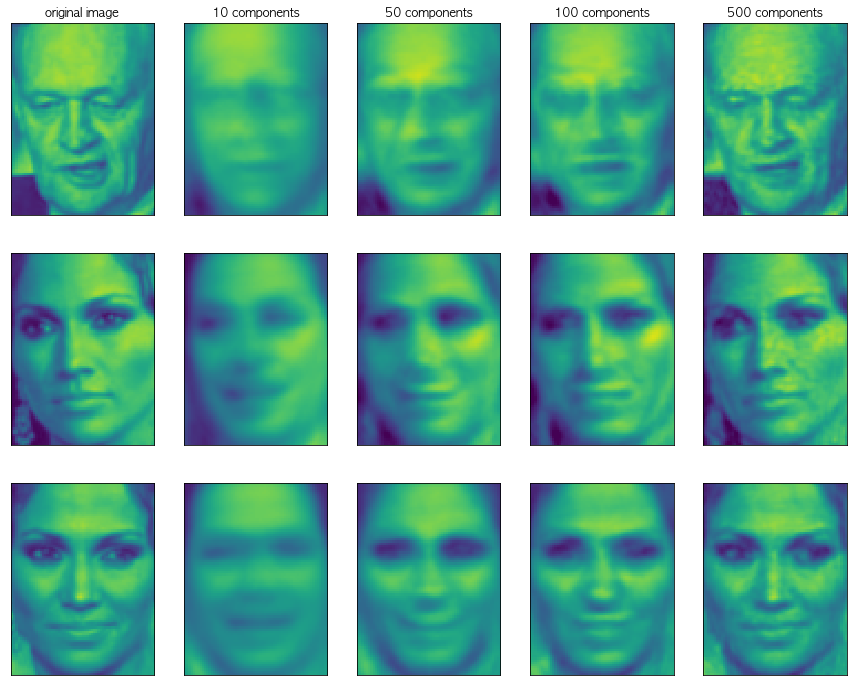

In [37]:
# 주성분으로 포함한 항목이 많아질수록 데이터가 원본에 비슷해진다.
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

주성분이 적으면 얼굴의 각도, 조명 등 이미지의 기본 요소만 나타난다. 주성분이 많아질수록 이미지가 점차 상세해지는 걸 볼 수 있다.

Text(0, 0.5, 'PC 2')

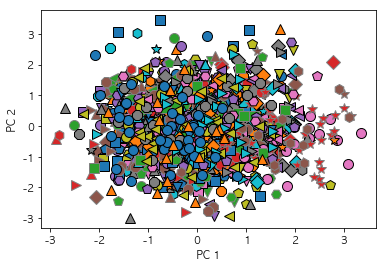

In [38]:
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:,1], y_train)
plt.xlabel("PC 1")
plt.ylabel("PC 2")

주성분을 두 개만 사용할 경우, 전체 데이터가 한 덩어리로 뭉쳐 있어 클래스가 잘 구분되지 않는다는 단점이 보인다. 10개를 썼을 때에도 대략적인 개형만 나타난 걸 고려해보면 당연한 현상

# NMF(비음수 행렬분해) - 뭔 소리인지 몰라서 우선 패스 

# t-SNE를 이용한 Manifold 학습

PCA는 데이터를 산점도로 시각화할 수 있다는 점 때문에 많이 이용되지만, 알고리즘의 '회전 / 방향 제거'라는 특성상 유용성이 떨어지는 편임.

Manifold 학습 알고리즘... 훨씬 복잡한 매핑을 만들어 더 나은 시각화를 제공한다. 특히 t-SNE 알고리즘이 많이 쓰인다고.

## Manifold 학습 알고리즘

목적이 시각화 -> 3개 이상의 특성을 뽑는 경우는 거의 없다.

(t-SNE를 포함해 이 형태의 알고리즘은) 훈련 데이터를 새로운 표현으로 변환시킬 수는 있으나, 새로운 데이터에는 적용하지 못한다. 즉 'EDA'에는 유용하지만 지도학습에는 사용하기 어려움

- 아이디어: 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것. '가까운 이웃 데이터 포인트의 정보'를 최대한 보존하려 한다.

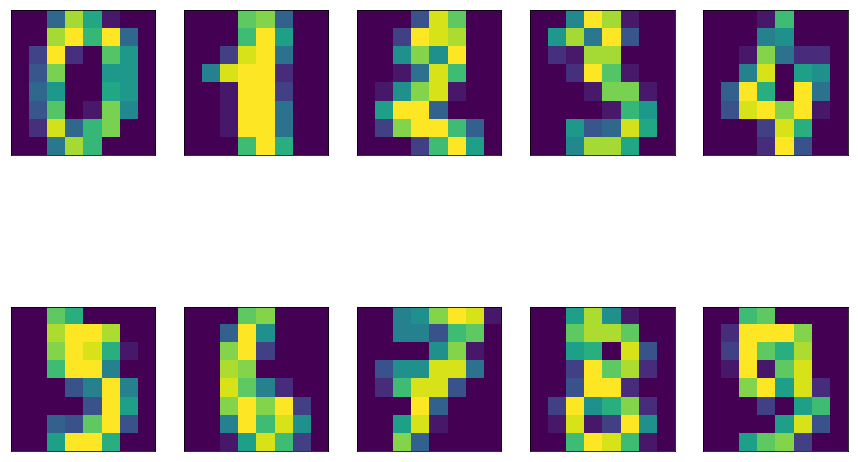

In [40]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2,5, figsize=(15,10), subplot_kw = {"xticks":(),'yticks':()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

### 1. PCA 사용해 2차원으로 축소하기

Text(0, 0.5, 'PC 2')

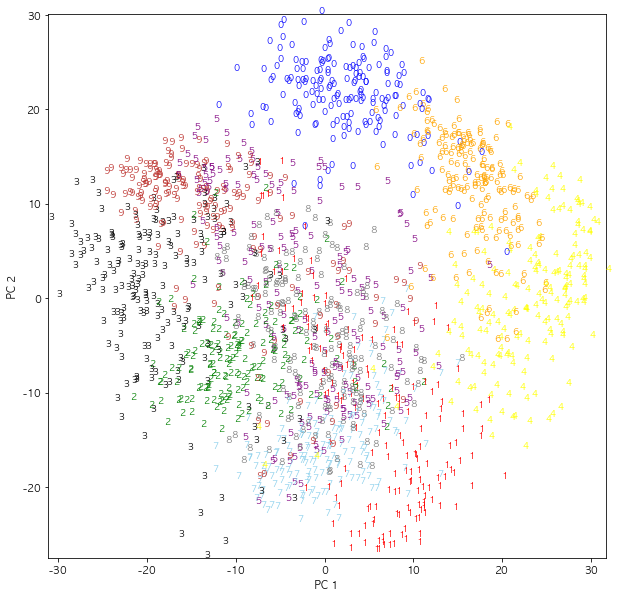

In [41]:
pca = PCA(n_components = 2)
pca.fit(digits.data)

# 처음 두 개의 주성분으로 숫자 데이터를 변환한다
digits_pca = pca.transform(digits.data)
colors = ['blue','red','green','black','yellow','purple','orange','skyblue','gray','#BD3430']
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]), color = colors[digits.target[i]], 
             fontdict = {'weight':'bold','size':9})
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')

구분되는 클래스도 있지만, 제대로 구분되지 않는 클래스도 많이 보인다.

In [42]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

# tsne는 transform 메소드가 없다. fit_transform을 써야 함
digit_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 'tsne 2')

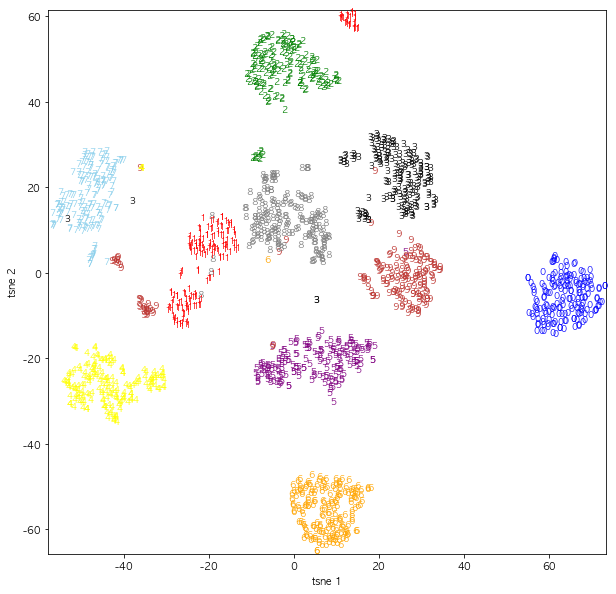

In [43]:
plt.figure(figsize=(10,10))
plt.xlim(digit_tsne[:,0].min(),digit_tsne[:,0].max()+1)
plt.ylim(digit_tsne[:,1].min(),digit_tsne[:,1].max()+1)


for i in range(len(digits.data)):
    plt.text(digit_tsne[i,0], digit_tsne[i,1], str(digits.target[i]), color = colors[digits.target[i]], 
             fontdict = {'weight':'bold','size':9})
    
plt.xlabel('tsne 1')
plt.ylabel('tsne 2')

'원본 데이터에서 포인트들이 얼마나 가까이 있는지' 에 대한 정보로 클래스가 잘 구분되는 2차원 표현을 찾다.


### tsne

매개변수 조정이 필요하지만, 기본적으로는 잘 작동한다. perplexity / early_exaggeration을 변경할 수 있지만 효과는 크지 않다.
- perplexity 값이 크면 더 많은 이웃을 포함하며 작은 그룹을 무시한다. 보통 데이터셋이 클 경우 이 값도 커야 한다. 기본값은 30, 보통 5~50 사이의 값 지정
- early_exaggeration은 초기 과장 단계에서 원본 공간의 클러스터가 얼마나 멀게 2차원을 나타낼 건지 정한다. 기본값은 4, 최소 1보다 커야 하며 값이 클수록 간격이 커진다.


# K-means 알고리즘 

가장 간단하며 널리 쓰이는 알고리즘. 데이터의 어떤 영역을 대표하는 '클러스터 중심(cluster center)'를 찾는다.

작동 방식
- 데이터 포인트를 가장 가까운 클러스터 중심에 할당.
- 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정한다.
    클러스터 포인트에 변화가 없을 때 알고리즘이 종료된다.
    

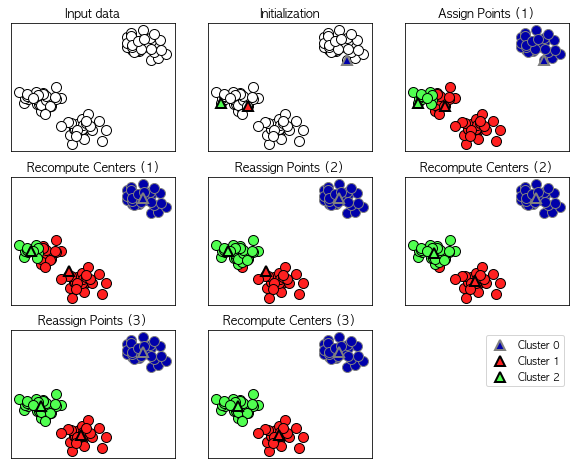

In [45]:
mglearn.plots.plot_kmeans_algorithm()